In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
data = pd.read_csv('/gdrive/My Drive/ML/data/snsdata.csv', sep=",")

In [ ]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [3]:
data = data.dropna()

In [4]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0


In [5]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000
mean,2007.484524,17.951418,30.760966,0.276526,0.266236,0.227911,0.167548,0.146178,0.136888,0.108311,0.112727,0.087232,0.147844,0.332181,0.217038,0.144095,0.129640,0.106353,0.433326,0.312185,0.043241,0.765882,0.254739,0.477859,0.258404,0.110769,0.021121,0.438242,0.115434,0.105228,0.267403,0.362549,0.152510,0.070444,0.052989,0.188086,0.118892,0.092106,0.064403
std,1.116067,7.625351,36.368500,0.814345,0.720804,0.928364,0.746042,0.656390,0.524527,0.518625,0.549536,0.511138,0.484741,0.817428,1.187988,0.529837,0.484924,0.520592,1.180589,1.084662,0.296702,1.207932,0.741818,1.336075,0.862050,0.548227,0.193018,1.126030,0.455261,2.159181,0.713282,0.731995,0.479919,0.351271,0.285502,0.622570,0.440071,0.410725,0.363771
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,16.309000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,17.287000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,13.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,34.000000,11.000000,27.000000,21.000000,79.000000,44.000000,29.000000,8.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


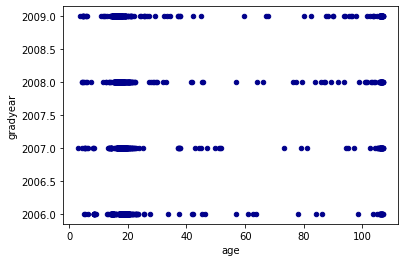

In [6]:
# 나이에 최소가 3세, 최대가 106세다. 문제가 있다. 졸업년도를 이용해 나이를 보정하자.
data.plot.scatter(x='age', y='gradyear',c='DarkBlue')

In [8]:
age_est = data.groupby('gradyear')['age'].median()
age_est

gradyear
2006    18.678
2007    17.697
2008    16.739
2009    15.792
Name: age, dtype: float64

In [9]:
age_est = age_est.to_dict()

In [10]:
for idx, row in data.iterrows():
    if row['age'] > 20:
        data.at[idx, 'age']  = age_est[data.loc[idx]['gradyear']]


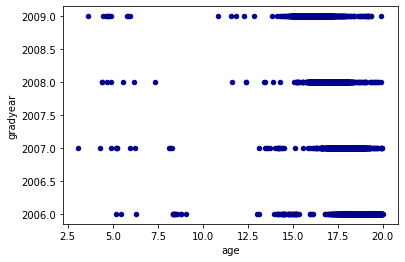

In [11]:
data.plot.scatter(x='age', y='gradyear',c='DarkBlue')

In [12]:
interest = data.iloc[:,4:]

In [13]:
interest.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0


In [14]:
interest = (interest - interest.mean())/interest.std()

In [15]:
interest.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.339568,-0.369360,-0.245497,-0.224583,-0.2227,-0.260974,-0.208842,-0.20513,-0.170662,-0.304997,-0.406373,-0.182694,-0.271961,-0.26734,-0.204292,0.479992,-0.287818,-0.145739,-0.634044,-0.343397,-0.357659,-0.299756,-0.202049,-0.109423,-0.389192,-0.253556,-0.048735,-0.37489,-0.49529,-0.317782,-0.200540,-0.185599,-0.302112,-0.270165,-0.224252,-0.177043
1,-0.339568,1.017979,-0.245497,-0.224583,-0.2227,-0.260974,-0.208842,-0.20513,-0.170662,-0.304997,0.816976,-0.182694,-0.271961,-0.26734,-0.204292,-0.367043,-0.287818,-0.145739,1.021678,2.352680,0.390802,-0.299756,-0.202049,-0.109423,4.939265,8.532612,-0.048735,1.02708,-0.49529,-0.317782,-0.200540,-0.185599,-0.302112,-0.270165,-0.224252,-0.177043
2,-0.339568,1.017979,-0.245497,-0.224583,-0.2227,-0.260974,-0.208842,-0.20513,-0.170662,-0.304997,-0.406373,-0.182694,-0.271961,-0.26734,-0.204292,-0.367043,1.556075,-0.145739,0.193817,-0.343397,-0.357659,-0.299756,-0.202049,-0.109423,-0.389192,-0.253556,-0.048735,-0.37489,-0.49529,-0.317782,-0.200540,-0.185599,-0.302112,2.002194,-0.224252,-0.177043
3,-0.339568,-0.369360,-0.245497,-0.224583,-0.2227,-0.260974,-0.208842,-0.20513,-0.170662,-0.304997,0.816976,-0.182694,-0.271961,-0.26734,-0.204292,-0.367043,-0.287818,-0.145739,-0.634044,1.004641,-0.357659,-0.299756,-0.202049,-0.109423,-0.389192,-0.253556,-0.048735,-0.37489,-0.49529,-0.317782,-0.200540,-0.185599,-0.302112,-0.270165,-0.224252,-0.177043
6,-0.339568,-0.369360,-0.245497,-0.224583,-0.2227,-0.260974,-0.208842,-0.20513,-0.170662,-0.304997,-0.406373,-0.182694,-0.271961,-0.26734,-0.204292,-0.367043,0.634129,3.224651,-0.634044,-0.343397,-0.357659,-0.299756,-0.202049,-0.109423,-0.389192,-0.253556,-0.048735,2.42905,-0.49529,-0.317782,5.493075,-0.185599,-0.302112,-0.270165,-0.224252,-0.177043


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(interest)
centers = kmeans.cluster_centers_

In [17]:
centers.shape

(5, 36)

In [18]:
center_df = pd.DataFrame(centers, columns = interest.columns.to_list())
center_df.head()


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.519891,0.492721,0.286709,0.378113,0.376253,0.258507,0.328164,0.362516,0.142202,0.326102,0.510059,-0.007174,0.181949,0.365233,-0.043919,0.454660,-0.063985,-0.109340,0.282879,0.207017,0.357537,0.535029,0.298006,0.244576,0.221856,0.385562,0.027733,0.467456,0.640740,0.373750,-0.062190,-0.077939,0.039153,0.116820,-0.009855,-0.074278
1,-0.166322,-0.168346,-0.089804,-0.116948,-0.116169,-0.094922,-0.113343,-0.112230,-0.050371,-0.130635,-0.184161,-0.095612,-0.082018,-0.135470,-0.133023,-0.160311,-0.134295,-0.115119,-0.157833,-0.125322,-0.125193,-0.161458,-0.093210,-0.075716,-0.204664,-0.144766,-0.027507,-0.184986,-0.223921,-0.189300,-0.155320,-0.149467,-0.099036,-0.085697,-0.089679,-0.114204
2,0.159513,0.244867,0.120076,0.043124,0.196471,0.204995,0.380921,0.005814,0.099848,0.086850,0.406915,0.008936,0.133982,0.429654,0.029112,0.205534,-0.116562,-0.112788,0.105944,0.046329,0.022844,-0.024331,0.019590,-0.029829,0.418262,0.126850,0.057994,0.611971,0.767808,0.540719,4.081600,3.908925,0.045609,0.085288,0.023981,0.022603
3,0.312305,0.329962,0.129441,0.184249,0.077031,0.240614,0.159285,0.269394,0.114032,0.763708,0.460937,1.948652,0.505839,0.313623,2.879416,0.408995,0.363662,-0.031954,1.120944,1.170988,0.389931,0.176948,0.120719,0.113734,2.491111,0.549371,0.350782,0.591310,0.234691,1.210414,0.137498,0.242542,1.711772,0.962570,1.867510,2.706348
4,-0.086879,0.073887,-0.082173,-0.026183,-0.065951,0.038419,-0.100948,-0.119728,0.009442,-0.107638,-0.002270,-0.026193,-0.013043,-0.044000,-0.023992,0.085525,4.278646,4.690831,0.527053,0.184625,0.113845,0.079242,0.067939,0.068260,-0.028512,0.091388,-0.012788,-0.073745,-0.029227,0.005678,-0.164569,-0.147665,-0.003478,0.021058,-0.079223,-0.062916


In [19]:
cluster_ids = kmeans.fit_predict(interest)

In [20]:
cluster_ids.shape

(24005,)

In [21]:
data.shape

(24005, 40)

In [22]:
data['cluster'] = cluster_ids

In [23]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,3
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0
